In [8]:
import cv2
import numpy as np
import torch
from torch.nn import functional as F
from IPython.display import display
from PIL import Image

https://blog.csdn.net/qq_34914551/article/details/110186855

(1, 3, 256, 256)
torch.Size([1, 256, 256, 2]) torch.float32 tensor(-1.3607) tensor(1.3607)
torch.Size([1, 3, 256, 256]) tensor(0.) tensor(240.)


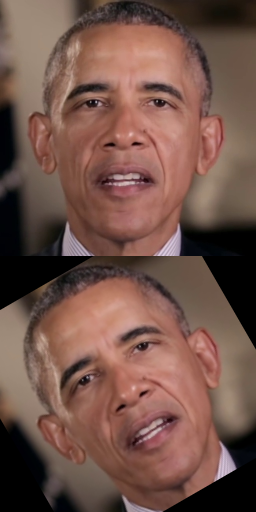

In [18]:
img = cv2.imread('../torchvision_learn/data/obama.jpg')
img = cv2.resize(img, dsize=None, dst=None, fx=0.5, fy=0.5)
size = img.shape[:2]
size = (1, 3,) + size
print(size)

angle = 30 * np.pi / 180  # np默认角度为弧度制

theta = np.array([np.cos(angle), np.sin(-angle), 0,
                    np.sin(angle), np.cos(angle), 0])  # 30度的旋转矩阵
theta = theta.reshape(1, 2, 3)

theta = torch.from_numpy(theta).float()  # 调整dtype
grid = F.affine_grid(theta, size=torch.Size(size))  # 得到grid 用于grid sample
print(grid.shape, grid.dtype, grid.min(), grid.max())

# print(grid.min(), grid.max())
# grid = torch.clamp(grid, -1, 1)
img_tensor = torch.from_numpy(img).float().permute(2, 0, 1).unsqueeze(0)
print(img_tensor.shape, img_tensor.min(), img_tensor.max())

warp_img = F.grid_sample(img_tensor, grid).squeeze().permute(1, 2, 0).numpy()
warp_img = np.clip(warp_img, 0, 255).astype(np.uint8)


img_vis = np.concatenate((img, warp_img), axis=0) # 原图在上，affined在下
display(Image.fromarray(img_vis[..., ::-1]))
# cv2.imshow('res', img_vis)
# cv2.waitKey()
